# Natural Language Processing

## Importing the libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Importing the dataset

In [7]:
df=pd.read_csv("Restaurant_Reviews.tsv", delimiter='\t', quoting=3)

In [8]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


## Cleaning the texts

In [14]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus=[]
for i in range(0,1000):
    review=re.sub('[^a-zA-Z]', ' ',df['Review'][i])
    review=review.lower()
    review=review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)   

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SNEHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Creating the Bag of Words model

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Training the Naive Bayes model on the Training set

In [17]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Predicting the Test set results

In [18]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]

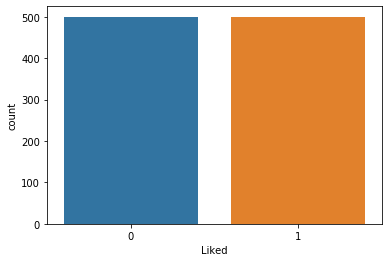

In [22]:
sns.countplot(x='Liked', data=df)

## Making the Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[55 42]
 [12 91]]


0.73